# Tarea 1

## Objetivos

1. Seleccionar un conjunto de datos. 
2. Calular los paramétros `m` y `b` para los datos de entrenamiento.
3. Graficar los datos y el modelo lineal encontrado.

## Conjunto de datos

Para este ejercicio se seleccionó el conjunto de datos sobre variantes de vino tinto de Portugal, disponible en [Kaggle](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009).

## Procedimiento

En primer lugar se realizará una lectura y análisis del conjunto de datos, obteniendo una matriz de correlación para determinar los valores con una mayor interacción.

In [12]:
import numpy as np
import pandas as pd

# Ugly path hack...
wine_df = pd.read_csv('../../../AA/Tarea1/winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


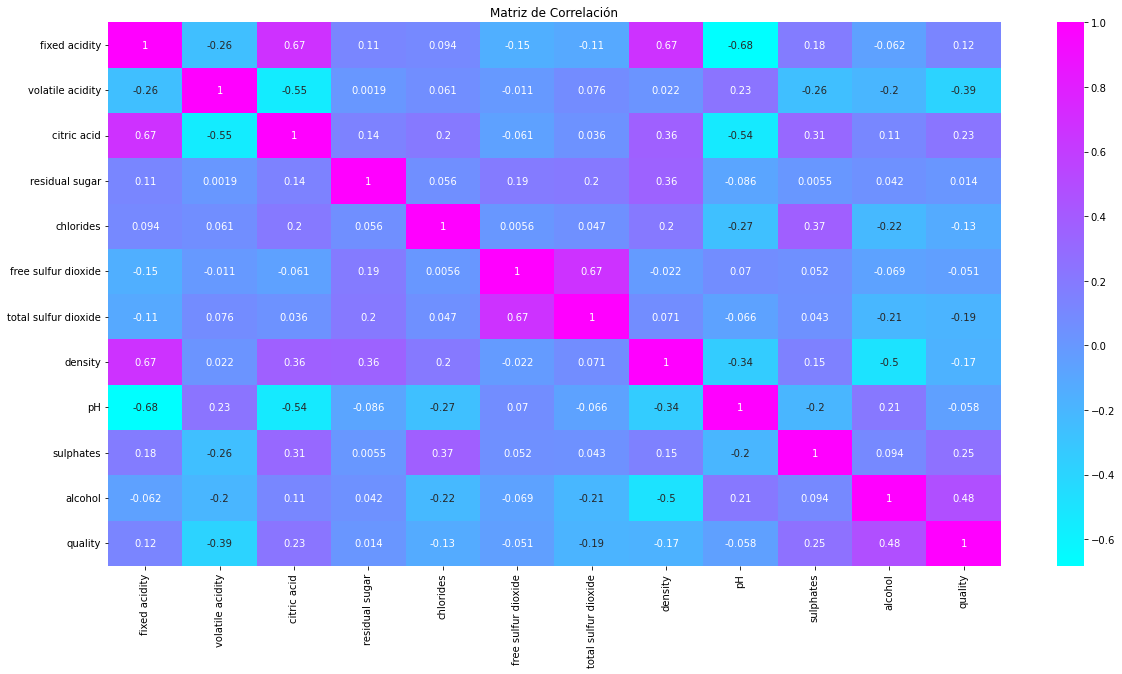

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)
mat_corr = sns.heatmap(wine_df.corr(), annot = True, cmap = 'cool')
plt.title('Matriz de Correlación')
plt.show()

Aqui buscamos por la mayor correlación entre la calidad y los demás componentes. Se puede observar que la mayor correlación existe entre con la cantidad de alcohol.

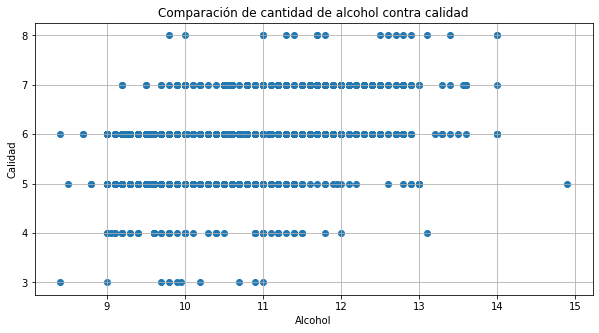

In [20]:
x = wine_df['alcohol']
y = wine_df['quality']

plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(x, y)
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.title('Comparación de cantidad de alcohol contra calidad')
plt.grid(True)

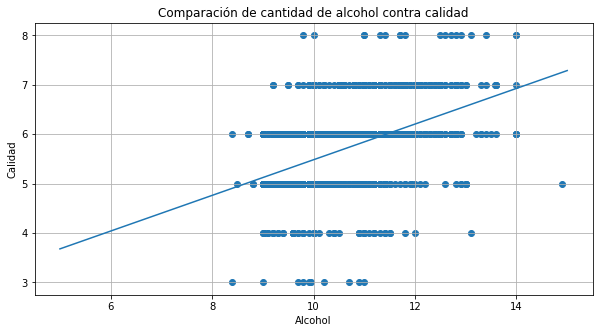

In [29]:
def calculate_m_b(x_values, y_values):
    n = len(x_values)
    r = 0
    _x = sum(x_values)
    _y = sum(y_values)

    _x_2 = 0
    for i in range(len(x_values)):
        r += x_values[i] * y_values[i]
        _x_2 += x_values[i]**2

    m = (n * r - _x * _y) / (n * _x_2 - _x**2)
    b = (_y - m * _x) / n
    return m, b

m, b = calculate_m_b(x, y)


x_model = np.linspace(5, 15, 100)
y_model = m * x_model + b

plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x_model, y_model, zorder=2)
plt.scatter(x, y)
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.title('Comparación de cantidad de alcohol contra calidad')
plt.grid(True)

## Comparando resultados con scipy.stats.

Para validar que la regresión lineal es cercana a lo esperado se obtienen los valores de `m` y `b` utilizando scipy.stats.

In [33]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x, y)

print('==== Valores calculados ====')

print(f'm = {m}')
print(f'b = {b}')

print('==== Valores con scipy.stats.linregress ====')

print(f'm = {slope}')
print(f'b = {intercept}')



==== Valores calculados ====
m = 0.36084176533492507
b = 1.8749748869983032
==== Valores con scipy.stats.linregress ====
m = 0.36084176533503454
b = 1.8749748869971525
